In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

# Load the uploaded dataset
file_path = 'cleaned_delhi_air_quality_data.csv'
data = pd.read_csv(file_path)

data.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15169 entries, 0 to 15168
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    15169 non-null  object 
 1   co      15169 non-null  float64
 2   no      15169 non-null  float64
 3   no2     15169 non-null  float64
 4   o3      15169 non-null  float64
 5   so2     15169 non-null  float64
 6   pm2_5   15169 non-null  float64
 7   pm10    15169 non-null  float64
 8   nh3     15169 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [7]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

In [8]:
# Drop 'date' column for model input as it is not directly used for predictions
features = data.drop(columns=['date'])

In [9]:
# Split features and target variable (for simplicity, using 'pm2_5' as a proxy for AQI classification)
X = features.drop(columns=['pm2_5'])
y = pd.cut(features['pm2_5'], bins=[0, 50, 100, 200, 300, 400, 500], labels=[1, 2, 3, 4, 5, 6],
           include_lowest=True,
           duplicates='drop')


In [10]:
# Handle NaN values in 'y' by dropping rows with NaN
# You can choose other imputation strategies as well, such as replacing with a specific value
X = X[~y.isna()]
y = y[~y.isna()]

In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [14]:
# Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [15]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)

In [16]:
# Classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred, target_names=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
conf_matrix = confusion_matrix(y_test, y_pred)


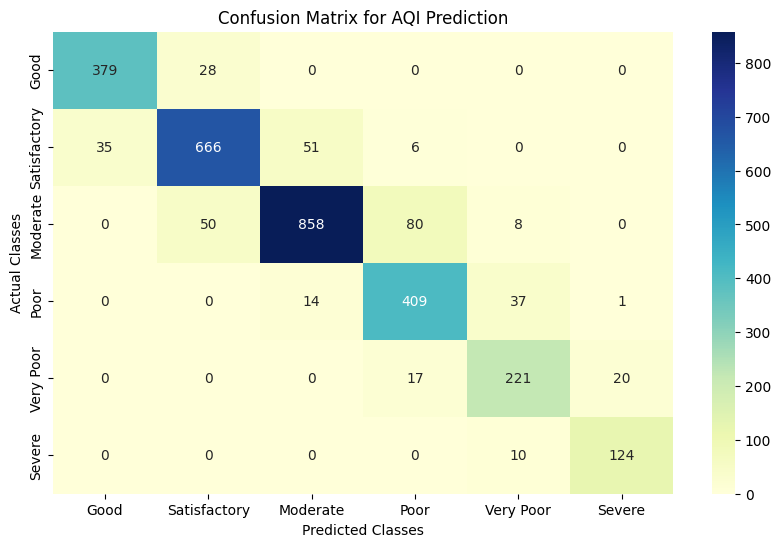

(None,
 '              precision    recall  f1-score   support\n\n        Good       0.92      0.93      0.92       407\nSatisfactory       0.90      0.88      0.89       758\n    Moderate       0.93      0.86      0.89       996\n        Poor       0.80      0.89      0.84       461\n   Very Poor       0.80      0.86      0.83       258\n      Severe       0.86      0.93      0.89       134\n\n    accuracy                           0.88      3014\n   macro avg       0.87      0.89      0.88      3014\nweighted avg       0.88      0.88      0.88      3014\n')

In [17]:
# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], yticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix for AQI Prediction")
plt.show(), classification_rep


In [18]:
import numpy as np
from sklearn.utils import class_weight # Import class_weight from sklearn.utils

# Calculate class weights to handle imbalance
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


In [19]:
# Initialize Gradient Boosting Classifier (note: Gradient Boosting typically does not support class weights natively,
# so we'll use these weights as guidance for handling imbalance in model evaluation)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [20]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)

In [21]:
# Classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred, target_names=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
conf_matrix = confusion_matrix(y_test, y_pred)

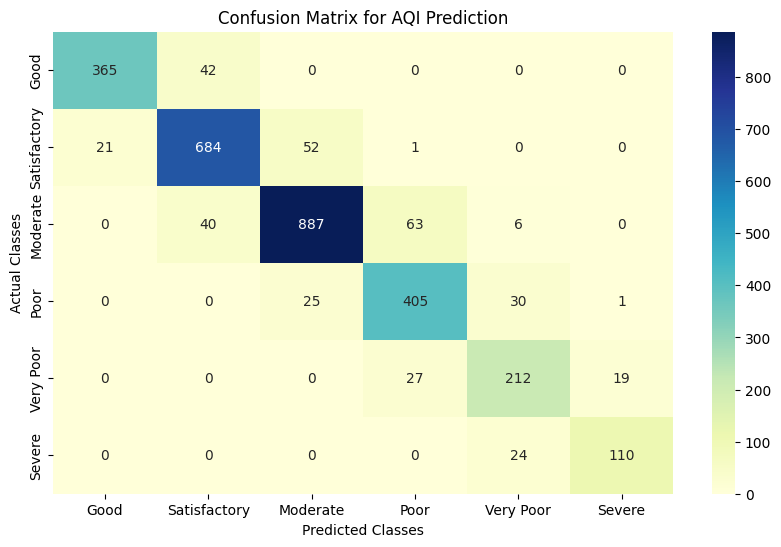

(None,
 '              precision    recall  f1-score   support\n\n        Good       0.95      0.90      0.92       407\nSatisfactory       0.89      0.90      0.90       758\n    Moderate       0.92      0.89      0.91       996\n        Poor       0.82      0.88      0.85       461\n   Very Poor       0.78      0.82      0.80       258\n      Severe       0.85      0.82      0.83       134\n\n    accuracy                           0.88      3014\n   macro avg       0.87      0.87      0.87      3014\nweighted avg       0.89      0.88      0.88      3014\n')

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], yticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix for AQI Prediction")
plt.show(), classification_rep